### $\color{royalblue}{\text{Пета вјежба из нумеричких метода у астрономији, датум: 15.01.2026.}} $

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp, spline_der, extrema, spline_integrate, inverse_interp

#### $\color{magenta}{\text{Нумеричко диференцирање.}}$

Уопштено, имамо неку функцију $f(t)=a+bt+ct^2+dt^3$, и знамо да је $t=x-x_i$. Слиједи:

$$
\frac{df}{dt}=\frac{df}{dx}=b+2ct+3dt^2\,\wedge\,\frac{d^2f}{dt^2}=2c+6dt.
$$

За уводни дио, одређујемо хелиоцентричну радијалну брзину Сатурна у неком тренутку, коришћењем линеарне интерполације.

In [110]:
au = 1.496e+11    
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',',unpack=True)
t = t[::10]
x = x[::10] 
y = y[::10]
z = z[::10]

r = np.sqrt(x**2 + y**2 + z**2) 
t0 = 9439.0

**Линеарна интерполација**.

In [113]:
print(t)
print('t<t0 = {} \n '.format(t<t0))

t1 = np.flatnonzero(t<t0)[-1] # највећи који је мањи од t0 (посљедњи с лијеве стране)
print('t1 = {}\n'.format(t1))

t2 = np.flatnonzero(t>t0)[0] # најмањи који је већи од t0 (први с десне стране)
print('t2 = {}\n'.format(t2))

[    0.   200.   400.   600.   800.  1000.  1200.  1400.  1600.  1800.
  2000.  2200.  2400.  2600.  2800.  3000.  3200.  3400.  3600.  3800.
  4000.  4200.  4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.
  6000.  6200.  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.
  8000.  8200.  8400.  8600.  8800.  9000.  9200.  9400.  9600.  9800.
 10000. 10200. 10400. 10600.]
t<t0 = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False] 
 
t1 = 47

t2 = 48



--- 

За праву која пролази кроз тачке $(t_1, r_1)$ и $(t_2, r_2)$ важи:

$$
r = r_1 + \frac{r_2 - r_1}{t_2 - t_1} \cdot (t - t_1).
$$

Замјеном да је $t = t_0$ добијамо формулу:

$$
r_{\text{lin}} = r_1 + \frac{t_0 - t_1}{t_2 - t_1} \cdot (r_2 - r_1),
$$

гдје је $t_0$ вријеме за које интерполирамо, а $r_{\text{lin}}$ је нађено растојање.

Брзина се може наћи преко:

$$
v_{\text{r,lin}} = \frac{r_2 - r_1}{t_2 - t_1}.
$$

In [35]:
r_lin = r[t1]+(t0-t[t1])*(r[t2]-r[t1])/(t[t2]-t[t1])
print('r_lin = {} AJ\n'.format(r_lin))

vr_lin = (r[t2]-r[t1])/(t[t2]-t[t1])
print('vr_lin = {} AJ/d\n'.format(vr_lin))
print('vr_lin = {} m/s\n'.format(np.round(vr_lin*au/86400, 2)))

r_lin = 9.071030189411175 AJ

vr_lin = 0.00017978589397549705 AJ/d

vr_lin = 311.3 m/s



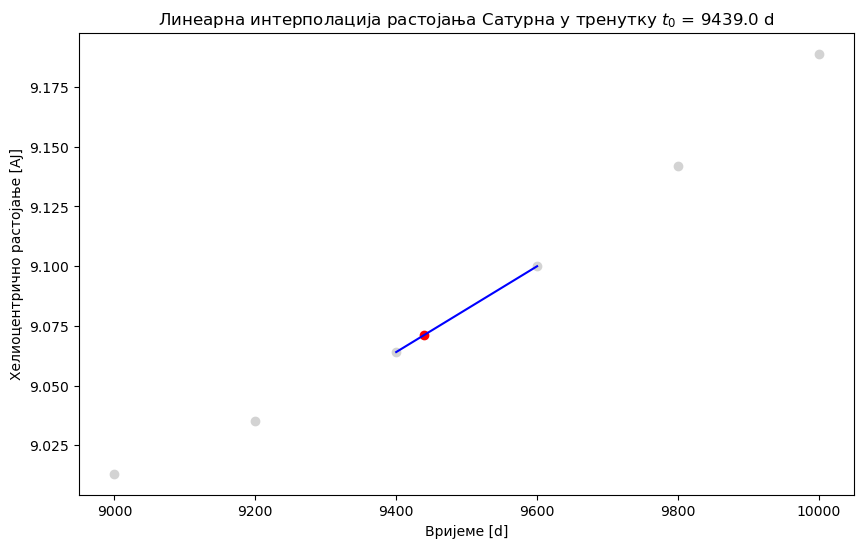

In [34]:
plt.figure(figsize=(10,6))
plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'o', color='lightgray')
plt.plot(t0, r_lin, 'o', color='red')
plt.plot([t[t1],t[t2]], [r[t1],r[t2]], '-', color='blue')

# plt.plot(t,r, '.')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]')
plt.title('Линеарна интерполација растојања Сатурна у тренутку $t_0$ = {} d'.format(t0))
plt.show()

**Интерполација сплајном**.

In [ ]:
tt = np.linspace(t[t1-2], t[t1+3], 100)
rr = spline_interp(t, r, tt)

r_splajn = spline_interp(t, r, [t0])
print('r_splajn = {} AJ\n'.format(r_splajn[0]))

r_splajn = 9.070500608100655 AJ
 3


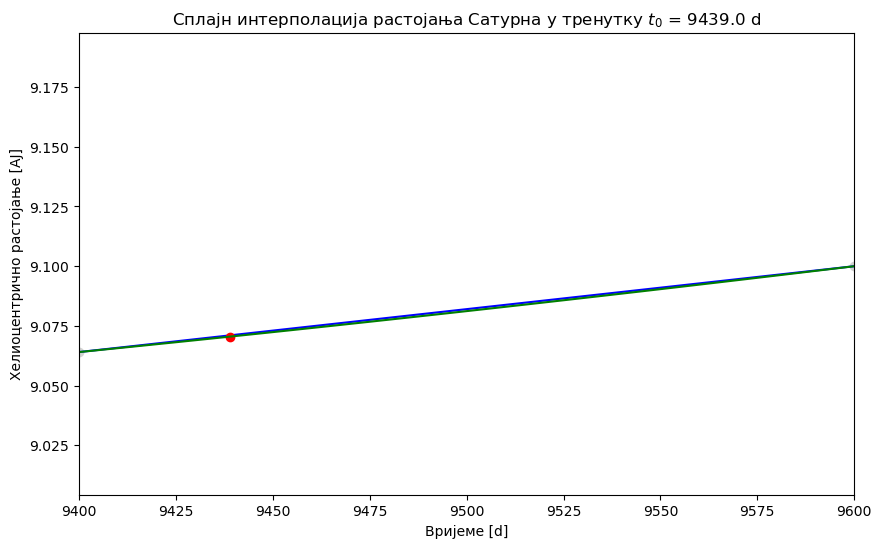

In [115]:
plt.figure(figsize=(10,6))
plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'o', color='lightgray')
plt.plot([t[t1],t[t2]],[r[t1], r[t2]], '-', color='blue')
plt.plot(t0, r_splajn,'o', color='red')
plt.plot(tt, rr,'-', color='green')

plt.xlim(9400, 9600)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]')
plt.title('Сплајн интерполација растојања Сатурна у тренутку $t_0$ = {} d'.format(t0))
plt.show()

**Извод функције коришћењем сплајна**.

In [52]:
vr_splajn = spline_der(t, r, [t0], 1) # 1 - први извод; 2 - други извод
print('vr_splajn= {[0]} m/s\n '.format(np.round(vr_splajn*au/86400,2)))

vr_splajn= 293.72 m/s
 


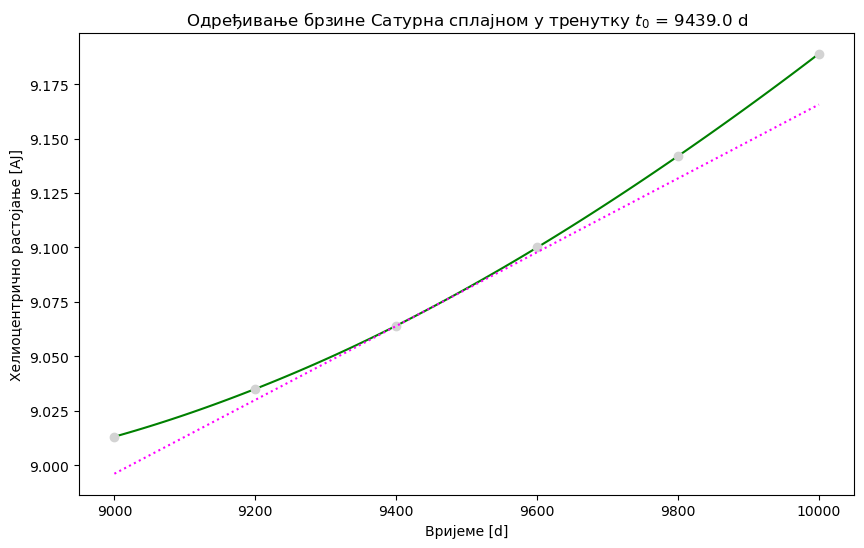

In [54]:
plt.figure(figsize=(10,6))
plt.plot(tt, rr,'-', color='green')
plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'o', color='lightgray')
plt.plot([t[t1-2], t[t2+2]], [vr_splajn*(t[t1-2]-t0)+r_splajn, vr_splajn*(t[t2+2]-t0)+r_splajn], ':', color='magenta')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]')
plt.title('Одређивање брзине Сатурна сплајном у тренутку $t_0$ = {} d'.format(t0))
plt.show()

**Локални екстремуми и сплајн**.

Тражимо максимуме и минимуме за криву сјаја астероида Рјугу (алтернатива је `np.gradient`).

In [117]:
t, m = np.loadtxt('Ryugy_light_curve.txt', delimiter=',', unpack=True) # јул. дан, привидна магнитуда
print(len(t), len(m))

57 57


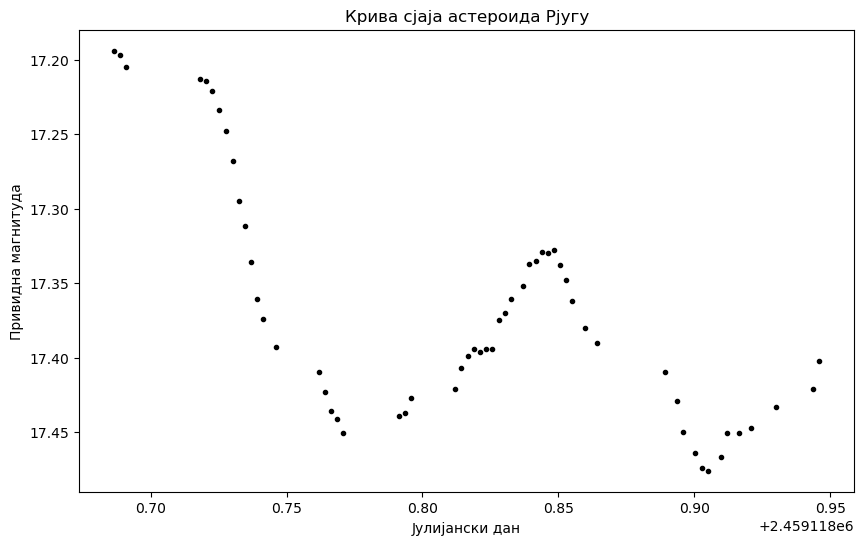

In [118]:
plt.figure(figsize=(10,6))
plt.plot(t, m, '.', color='black')
plt.xlabel('Јулијански дан')
plt.ylabel('Привидна магнитуда')
plt.title('Крива сјаја астероида Рјугу')
plt.gca().invert_yaxis() # инвертовање ординате
plt.show()

Како налазимо екстремуме помоћу сплајна? Испод је поједностављен приказ функције `extrema`.

$$
y = a + b(x-x_i) + c(x-x_i)^2 + d(x-x_i)^3,
$$

$$
\frac{dy}{dx} = b + 2c(x-x_i) + 3d(x-x_i)^2,
$$

$$
\frac{d^2y}{dx^2} = 2c + 6d(x-x_i),
$$

$$
3d(x-x_i)^2 + 2c(x-x_i) + b = 0,
$$

$$
x-x_i = \frac{-2c \pm \sqrt{4c^2 - 12bd}}{6d}.
$$

$$
\frac{d^2y}{dx^2} > 0 \Rightarrow \text{локални минимум};
$$

$$
\frac{d^2y}{dx^2} < 0 \Rightarrow \text{локални максимум}.
$$

Проналаском $x=x_c$ може се евалуирати и $y$ вриједност:
$$
y_{\text{ext}} = a + b(x_c-x_i) + c(x_c-x_i)^2 + d(x_c-x_i)^3.
$$

(array([[2459118.7187052 ],
       [2459118.75517366],
       [2459118.79907182],
       [2459118.81907965],
       [2459118.82325274],
       [2459118.84042747],
       [2459118.84434842],
       [2459118.84807651],
       [2459118.91358832],
       [2459118.9297931 ]]), array([17.21291482, 17.39754631, 17.42066889, 17.39398161, 17.39395025,
       17.33522818, 17.32879047, 17.3277477 , 17.44713378, 17.43299112]))


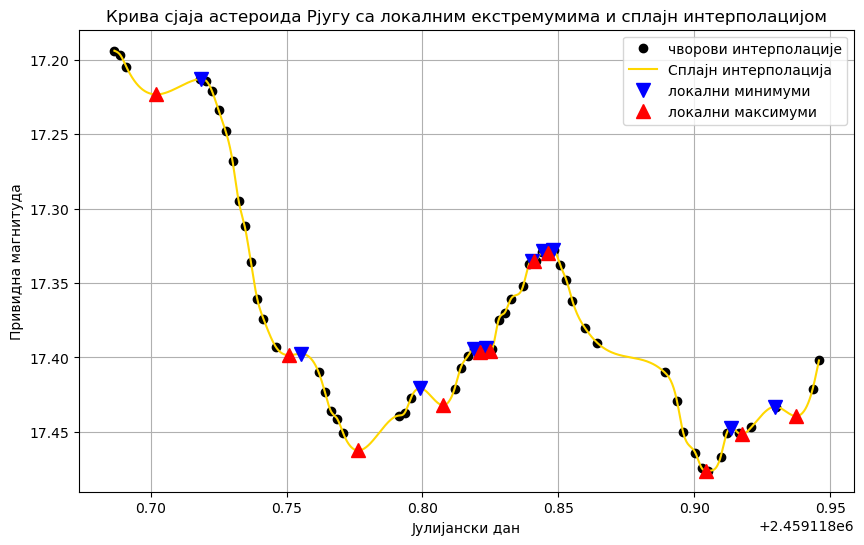

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, m, 'o', color='black', label ='чворови интерполације')
   
minimumi = extrema(t, m,'min')
maksimumi = extrema(t, m,'max')

tt = np.linspace(t[0], t[-1], 1000)
mm = spline_interp(t, m, tt)

plt.plot(tt, mm, color='gold', label ='Сплајн интерполација')

plt.plot(minimumi[0], minimumi[1], 'v', color='blue', markersize=10, label ='локални минимуми')
plt.plot(maksimumi[0], maksimumi[1], '^', color='red', markersize=10, label ='локални максимуми')

plt.xlabel('Јулијански дан')
plt.ylabel('Привидна магнитуда')
plt.title('Крива сјаја астероида Рјугу са локалним екстремумима и сплајн интерполацијом')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

**Примјер**: одредити максимални и минимални сјај астероида Рјугу као и тренутке у којима до њих долази.

In [61]:
global_min_idx = np.argmin(m)  # индекс глобалног минимума
global_max_idx = np.argmax(m)  # индекс глобалног максимума

global_min_t = t[global_min_idx] 
global_max_t = t[global_max_idx] 
global_min_m = m[global_min_idx] 
global_max_m = m[global_max_idx] 

print(f'Максимални сјај (минимална магнитуда): {global_min_m} у тренутку: {global_min_t}')
print(f'Минимални сјај (максимална магнитуда): {global_max_m} у тренутку: {global_max_t}')

Максимални сјај (минимална магнитуда): 17.194 у тренутку: 2459118.686655
Минимални сјај (максимална магнитуда): 17.476 у тренутку: 2459118.905029


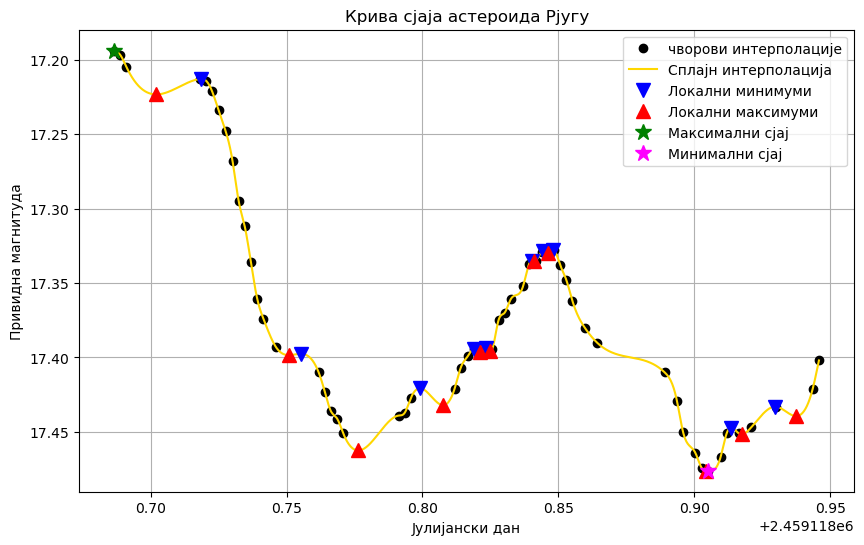

In [68]:
plt.figure(figsize=(10,6))

plt.plot(t, m,'o', color='black', label ='чворови интерполације')
plt.plot(tt, mm, color='gold',label ='Сплајн интерполација')
plt.plot(minimumi[0], minimumi[1], 'v', color='blue', markersize=10, label ='Локални минимуми')
plt.plot(maksimumi[0], maksimumi[1], '^', color='red', markersize=10,label ='Локални максимуми')
plt.plot(global_min_t, global_min_m, '*', color='green', markersize=12, label='Максимални сјај')
plt.plot(global_max_t, global_max_m, '*', color='magenta', markersize=12, label='Минимални сјај')

plt.xlabel('Јулијански дан')
plt.ylabel('Привидна магнитуда')
plt.title('Крива сјаја астероида Рјугу')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

#### $\color{magenta}{\text{Нумеричка интеграција.}}$

Уопштено, опет имамо функцију $y = a + bt + ct^2 + dt^3$, гдје је $t = x - x_i$.

Слиједи једначина:

$$
\int_{x_p}^{x_k} y(x) dx = \int_{t(x_p)}^{t(x_k)} y(t) dt = \int_{t(x_p)}^{t(x_k)} (a + bt + ct^2 + dt^3) dt
$$

$$
= a(t_k - t_p) + \frac{b}{2}(t_k^2 - t_p^2) + \frac{c}{3}(t_k^3 - t_p^3) + \frac{d}{4}(t_k^4 - t_p^4)
$$

За $t_p = 0$ и $t_k = x_{i+1} - x_i = \Delta x$, добијамо:

$$
A = a(\Delta x) + \frac{b}{2}(\Delta x)^2 + \frac{c}{3}(\Delta x)^3 + \frac{d}{4}(\Delta x)^4.
$$

Дакле, сваки дио сплајна је интегрисан аналитички на интервалу $[x_i, x_{i+1}]$ коришћењем кубне полиномијалне формуле.

Површина једног сегмента је дата са $A$, а сума индивидуалних сегмената даје интеграл сплајн-интерполираних података.

---



Задатак је одредити укупну количину зрачења коју Сунце израчи на читавом датом опсјегу таласних дужина. Могу се користити нпр.

трапезна формула и сплајн. 



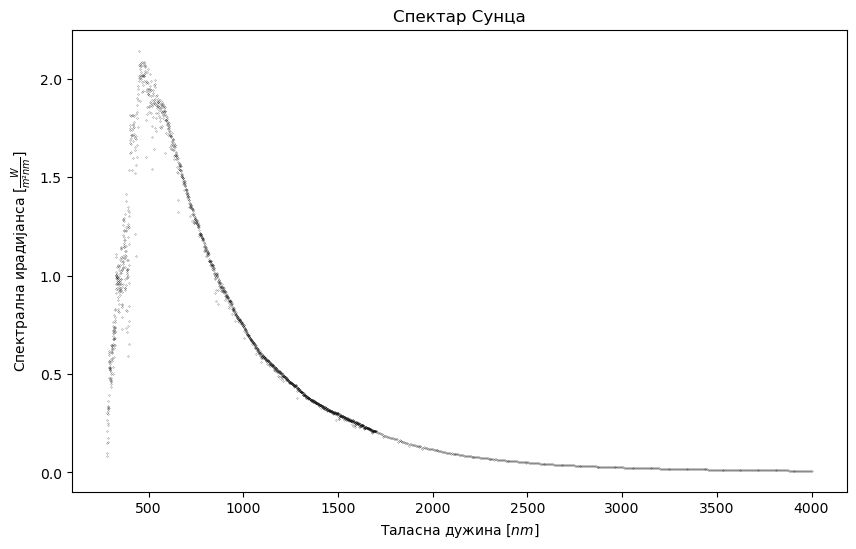

In [75]:
l, si = np.loadtxt('Spektar Sunca.txt', skiprows=2, delimiter=',', unpack=True)

plt.figure(figsize=(10, 6))
plt.scatter(l, si, marker='.', s=0.1, color='black')
plt.xlabel(r'Таласна дужина $[nm]$')
plt.ylabel(r'Спектрална ирадијанса $[\frac{W}{m²nm}]$')
plt.title('Спектар Сунца')
plt.show()

**Интеграција трапезним правилом**.

Користимо формулу:

$$
\int_{a}^{b} f(x) dx \approx \sum_{i=0}^{n-1} \frac{f(x_i) + f(x_{i+1})}{2} \cdot (x_{i+1} - x_i).
$$

In [ ]:
integral_trapez=0
for i in range (len(l) - 1):
    integral_trapez += (si[i+1] + si[i]) * (l[i+1] - l[i]) / 2

# print('Укупна ирадијанса на интервалу таласних дужина од {} до {} nm је {} W/m^2'.format(l[0],l[-1],np.round(integral_trapez, 5)))

Укупна ирадијанса на интервалу таласних дужина од 280.0 до 4000.0 nm је 1347.93368 W/m^2


**Интеграција сплајном**.

Испод је поједностављен приказ функције `integrate`.

$$
\int_{x_1}^{x_2} f(x) dx = \sum_{\text{сегменти}} \int_{t_p}^{t_k} (a_i + b_i t + c_i t^2 + d_i t^3) dt
$$

$$
= \sum_{\text{сегменти}} \left[ a_i(t_k - t_p) + \frac{b_i}{2}(t_k^2 - t_p^2) + \frac{c_i}{3}(t_k^3 - t_p^3) + \frac{d_i}{4}(t_k^4 - t_p^4) \right].
$$

Наравно, важи $t = x - x_i$. Функција `np.argwhere(x<=x1)[-1][0]` проналази посљедњи индекс гдје је $x \leq x_1$. Имамо случајеве:

$$
\text{случај 1: } i_1 = i_0 \,\, t_p = x_1 - x_{i_0}, \,\, t_k = x_2 - x_{i_0} \,\, \text{(интервал у једном сегменту)};
$$

$$
\text{случај 2: } i_1 - i_0 = 1; \,\, \text{два парцијална сегмента: } [x_1, x_{i_0+1}] + [x_{i_1}, x_2];
$$

$$
\text{случај 3: } i_1 - i_0 > 1; \,\, \text{више сегмената: парцијални } [x_1, x_{i_0+1}] + \text{ комплетни } [x_{i_0+1}, x_{i_1}] + \text{ парцијални } [x_{i_1}, x_2].
$$

За комплетне сегменте: $t_p = 0, \, t_k = x_{i+1} - x_i = \Delta x_i$.

In [ ]:
integral_splajn = spline_integrate(l, si, l[0], l[-1])
print('Укупна ирадијанса на интервалу таласних дужина од {} до {} nm је {} W/m^2'.format(l[0], l[-1], np.round(integral_splajn, 5)))

Укупна ирадијанса на интервалу таласних дужина од 280.0 до 4000.0 nm је 1347.93087 W/m^2


Релативна грешка је дата испод.

In [ ]:
print('Релативна грешка трапезне методе у односу на сплајн је {} %'.format(np.round((integral_trapez-integral_splajn)/integral_splajn*100, 5)))

Релативна грешка трапезне методе у односу на сплајн је 0.00021 %


**Примјер**: наћи укупну количину зрачења коју Сунце израчи на оспјегу таласних дужина од $\lambda_0$ до $\lambda$.

Суштински, имамо низ једначина:

$$
S_0 = \int_{\lambda_0}^{\lambda_0} I(\lambda) \, d\lambda = 0
$$

$$
S_1 = \int_{\lambda_0}^{\lambda_1} I(\lambda) \, d\lambda
$$

$$
S_2 = \int_{\lambda_0}^{\lambda_2} I(\lambda) \, d\lambda
$$

$$
\vdots
$$

$$
S_{n-1} = \int_{\lambda_0}^{\lambda_{n-1}} I(\lambda) \, d\lambda
$$

Ово даје тзв. кумулативну расподјелу.

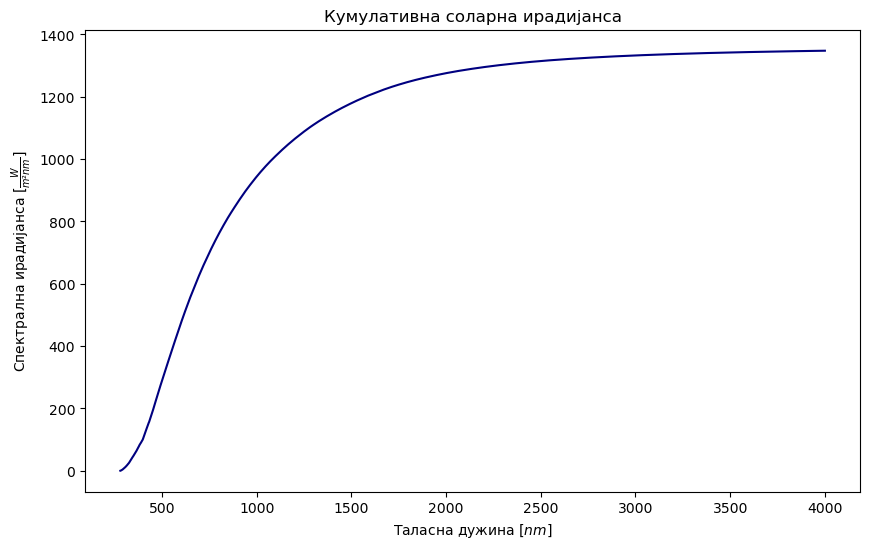

In [ ]:
plt.figure(figsize=(10, 6))

si_ukupno = np.zeros_like(l)

for i in range(len(l)):
    si_ukupno[i] = spline_integrate(l, si, l[0], l[i])

plt.plot(l, si_ukupno, color='navy')
plt.xlabel(r'Таласна дужина $[nm]$')
plt.ylabel(r'Спектрална ирадијанса $[\frac{W}{m²nm}]$')
plt.title('Кумулативна соларна ирадијанса')
plt.show()

*Одрадићемо на идућем часу* разматрање везано за густину чворова (како то утиче на разлиу између сплајна и трапезне методе).

---

#### $\color{magenta}{\text{Инверзна интерполација.}}$

Ово је опис функције `inverse_interp`, дат као низ једнакости:

$$
y = a_i + b_i t + c_i t^2 + d_i t^3,
$$

$$
a_i + b_i t + c_i t^2 + d_i t^3 = y_0,
$$

$$
d_i t^3 + c_i t^2 + b_i t + (a_i - y_0) = 0,
$$

$$
t = x - x_i\implies x=t+x_i.
$$

Рјешења се скупљају по свим сегментима - све x-коордианте гдје сплајн сијече $y = y_0$!


Одрадићемо примјер са Сатурном (х. растојање). Потребно је одредити тренутак у ком се Сатурн приближава Сунцу, 

а да се налази на неком хелиоцентричном растојању $r_0$. Треба наћи радијалну брзину и убрзање у том тренутку.

In [ ]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::25]
x = x[0::25]
y = y[0::25]
z = z[0::25]

r = np.sqrt(x**2+y**2+z**2)

r0 = 9.62 
r = np.sqrt(x**2+y**2+z**2) 
t0 = inverse_interp(t, r, [r0]) 

print('Тренуци у којима Сатурн има хелиоцентрично растојање {} АЈ су: {}'.format(r0, np.round(t0, 2)))

Тренуци у којима Сатурн има хелиоцентрично растојање 9.62 АЈ су: [ 742.27 5621.6 ]


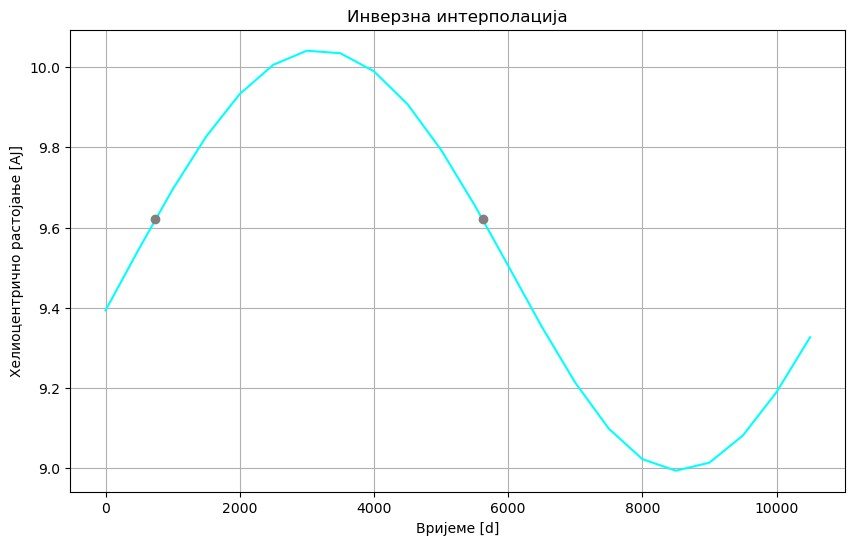

In [105]:
plt.figure(figsize=(10,6))
plt.plot(t, r, color='aqua')
plt.plot(t0, np.ones(len(t0))*r0, 'o', color='grey')
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]')
plt.title('Инверзна интерполација')
plt.grid()
plt.show() 

In [ ]:
for i in range(len(t0)):
    if r[t<t0[i]][-1]>r[t>t0[i]][0]: 
        break

trazeni_trenutak = t0[i]
print('Тражени тренутак је {}'.format(np.round(trazeni_trenutak, 2)))

Тражени тренутак је 5621.6


In [ ]:
vr = spline_der(t, r, [trazeni_trenutak], 1)*1731.48  # шта је ово 1731.48?
ar = spline_der(t, r, [trazeni_trenutak], 2)*0.0200402 # шта је ово 0.0200402?

print('Радијална брзина за {} дана је {} km/s'.format(np.round(trazeni_trenutak, 2), np.round(vr[0], 2)))
print('Радијално убрзање за {} дана је {} km/s²'.format(np.round(trazeni_trenutak, 2), np.round(ar[0], 5)))

Радијална брзина за 5621.6 дана је -0.52 km/s
Радијално убрзање за 5621.6 дана је -0.0 km/s²


#### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />
1. биће додато!
<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />